# New Section

TSF Task 1: Prediction using Supervised ML
#GRIPNOVEMBER21
Simple Linear Regression
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied.

**AUTHOR**: **VAISHNAVI SARODE**


In [ ]:
# Importing relevant libraries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import statsmodels.api as sm
import seaborn as sns
sns.set()

from scipy import stats
from scipy.stats import norm, skew

from sklearn.linear_model import LinearRegression

# Hide Warnings
import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# New Section

# New Section

In [ ]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)

In [ ]:

data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:

# Seeing data description
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [ ]:
# Checking for missing data
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [ ]:
# Checking correlation between input and target
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [ ]:

# Divide the dataset into inputs and targets
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values

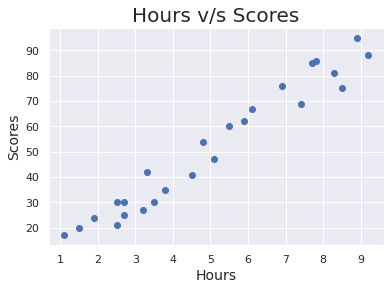

In [ ]:
# Visualizing the data through scatterplot
plt.scatter(X,y)
plt.xlabel('Hours',fontsize=14)
plt.ylabel('Scores',fontsize=14)
plt.title('Hours v/s Scores', fontsize=20)
plt.show()

It can be observed that data follows a linear trend. Therefore it proves that there is a positive linear relationship between the input(Hours) and the target(Scores).


 mu = 51.48 and sigma = 24.78



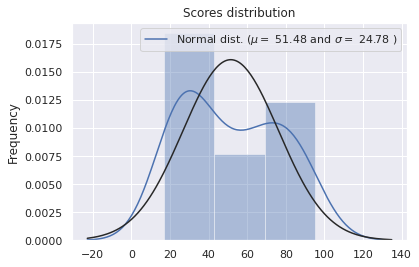

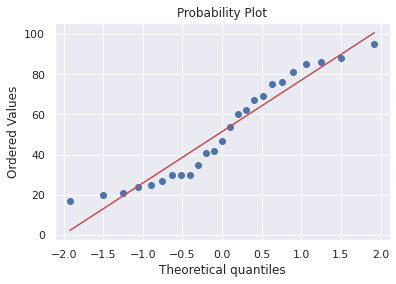

Skewness = 0.2339646665397317


In [ ]:
# visualizing the target
sns.distplot(y, fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(y)
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Scores distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(y, plot=plt)
plt.show()

print("Skewness =",data['Scores'].skew())



The target(Score) is more-or-less normally distributed with skewness=0.234

In [ ]:
# Implementing Ordinary Least Squares
X1 = sm.add_constant(X)
results = sm.OLS(y,X1).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     465.8
Date:                Tue, 12 Oct 2021   Prob (F-statistic):           9.13e-17
Time:                        06:29:09   Log-Likelihood:                -77.514
No. Observations:                  25   AIC:                             159.0
Df Residuals:                      23   BIC:                             161.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4837      2.532      0.981      0.337      -2.753       7.721
x1             9.7758      0.453     21.583      0.000       8.839      10.713
==============================================================================
Omnibus:                        7.616   Durbin-Watson:                   1.460
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                2.137
Skew:                          -0.216   Prob(JB):                        0.343
Kurtosis:                       1.634   Cond. No.                         13.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The p-value of the input variable is very low which proves that our input is statistically significant to predict the target. Also the R-Squared and Adjusted R-Squared are more or less same so we can tell that adding intercept causes no decrease to the predictive power of our linear model.


In [ ]:
# Optimal values of Slope and Intercept
results.params

array([2.48367341, 9.77580339])

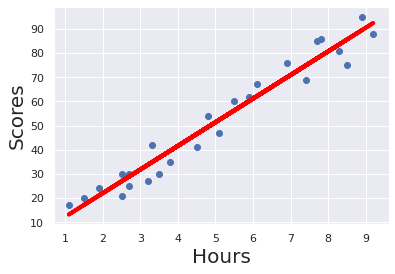

In [ ]:
# Plotting the best-fit line
plt.scatter(X,y)
yhat = 9.775803*X + 2.483673
fig = plt.plot(X,yhat,lw=4, c='red', label = 'regression line')
plt.xlabel('Hours',fontsize=20)
plt.ylabel('Scores',fontsize=20)
plt.show()


Linear regression is in its basic form the same in statsmodels and in scikit-learn. However, the implementation differs which may produce different results in edge cases, and scikit learn has in general more support for larger models. So, for purpose of generality we use Scikit Learn Library to evaluate our model.

**TRAIN-TEST-SPLIT**

In [ ]:
# Importing train_test_split from sklearn
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

The train-test-split splits the whole data into train and test sets.

**Using Linear Model from Scikit Learn Library**

In [ ]:
linear_model = LinearRegression()

In [ ]:
# Training the model
linear_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print("Intercept = ",linear_model.intercept_)

Intercept =  2.018160041434662


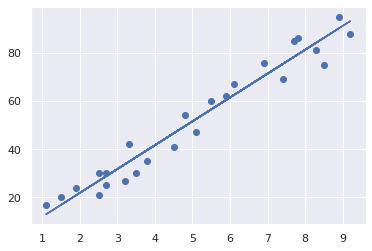

In [ ]:

# Plotting the regression line
best_fit_line = linear_model.coef_*X + linear_model.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, best_fit_line);
plt.show()

In [ ]:
linear_model.score(X_train, y_train)

0.9515510725211553


The model performs very good on train data providing accuracy of about 95%

**Making Predictions for test data**

In [ ]:
# Predicting the scores for test data
y_pred = linear_model.predict(X_test) 
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [ ]:
# Comparing the actual vs predicted scores
df = pd.DataFrame({'Actual Score': y_test, 'Predicted Score': y_pred})  
df

,Actual Score,Predicted Score
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


The difference between the predicted and actual scores is very less. Therefore, we can say that our model is good in predicting scores based on studying hours.

**Predict Score for a student who studies 9.25 hours a day**

In [ ]:
# Providing input in form of a 2-D array
hours_per_day = [[9.25]]

# Predicting the score
prediction = linear_model.predict(hours_per_day)
prediction

array([93.69173249])

If a student studies for 9.25 hrs/day, he's likely to score 93.69% marks

**Checking Train and Test Accuracies of our Linear Model** 

In [ ]:
print("Train Score =",linear_model.score(X_train, y_train))
print("Test Score =",linear_model.score(X_test, y_test))

Train Score = 0.9515510725211553
Test Score = 0.9454906892105354


**Train Accuracy = 95.15%**

**Test Accuracy = 94.54%**

**Evaluating the model's performance**

In [ ]:
# importing the required metrics for evaluation
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test, y_pred))) 
print('R2 Score:',r2_score(y_test, y_pred))

Root Mean Squared Error: 4.647447612100373
R2 Score: 0.9454906892105354


In [ ]:
from google.colab import drive
drive.mount('/content/drive')